<a href="https://colab.research.google.com/github/Anubhav4989/InternSavy_Internship_Tasks/blob/main/Anubhav_Kumar_Tiwary_InternSavy_Internship_Data_Science_Intern_Task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1: Use classification technique for prediction of Graduate Admissions from an Indian perspective.

Data set link: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

# **Predicting Graduate Admissions: A Data-Driven Approach**

In [142]:
# Import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Mount google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Admission_Predict.csv')

In [145]:
# Display top 5 rows of the datset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [146]:
# Display last 5 rows of the dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [147]:
# Find the shape of our dataset (Number of rows and number of columns)
data.shape

(400, 9)

In [148]:
print("Number of Rows =",data.shape[0])
print("Number of Columns =",data.shape[1])

Number of Rows = 400
Number of Columns = 9


In [149]:
# Get information about our dataset like total number of rows, total number of columns, datatypes of each column and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [150]:
# Check null values in the dataset
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [151]:
# Get overall statistics about the dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [152]:
# Dropping irrelevant features
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [153]:
data = data.drop('Serial No.',axis=1)

In [154]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [155]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [156]:
# Store feature matrix in x
x = data.drop('Chance of Admit ', axis = 1)

In [157]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [158]:
# Store Response (Target) Vector in y
y = data['Chance of Admit ']

In [159]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [160]:
# Splitting the dataset into the training set and testing set
from sklearn.model_selection import train_test_split

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [162]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
157,309,104,2,2.0,2.5,8.26,0
109,304,103,5,5.0,4.0,8.64,0
17,319,106,3,4.0,3.0,8.00,1
347,299,94,1,1.0,1.0,7.34,0
24,336,119,5,4.0,3.5,9.80,1
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [163]:
y_train

157    0.65
109    0.68
17     0.65
347    0.42
24     0.97
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 280, dtype: float64

In [164]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
60,309,100,2,3.0,3.0,8.10,0
79,294,93,1,1.5,2.0,7.36,0
285,331,116,5,4.0,4.0,9.26,1
305,321,109,3,3.5,3.5,8.80,1


In [165]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
60     0.48
79     0.46
285    0.93
305    0.74
281    0.80
Name: Chance of Admit , Length: 120, dtype: float64

In [166]:
'''
Convert the admission chance values in y_train and y_test into binary format:
- Assign 1 if the chance of admission is greater than 0.8, indicating likely admission.
- Assign 0 if the chance of admission is 0.8 or lower, indicating not likely admission.
This conversion is useful for certain classification tasks or threshold-based analysis.
'''
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]
# Convert the resulting lists into NumPy arrays for further numerical computations and modeling.
y_train = np.array(y_train)
y_test = np.array(y_test)

In [167]:
y_train

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [168]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

**Classification Technique**

In [169]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
# Model training & evaluation
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred1)*100)

Accuracy Score: 91.66666666666666


In [172]:
svm = svm.SVC()
svm.fit(x_train, y_train)
y_pred2 = svm.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred2)*100)

Accuracy Score: 71.66666666666667


In [173]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred3)*100)

Accuracy Score: 95.0


In [174]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred4 = rf.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred4)*100)

Accuracy Score: 93.33333333333333


In [175]:
gr = GradientBoostingClassifier()
gr.fit(x_train, y_train)
y_pred5 = gr.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred5)*100)

Accuracy Score: 96.66666666666667


In [176]:
final_data = pd.DataFrame({'ML_Models': ['LR', 'SVC', 'KNN', 'RF', 'GBC'],
                           'ACCURACY_SCORE': [accuracy_score(y_test, y_pred1)*100,
                                              accuracy_score(y_test, y_pred2)*100,
                                              accuracy_score(y_test, y_pred3)*100,
                                              accuracy_score(y_test, y_pred4)*100,
                                              accuracy_score(y_test, y_pred5)*100]})

In [177]:
final_data

,ML_Models,ACCURACY_SCORE
0,LR,91.666667
1,SVC,71.666667
2,KNN,95.000000
3,RF,93.333333
4,GBC,96.666667


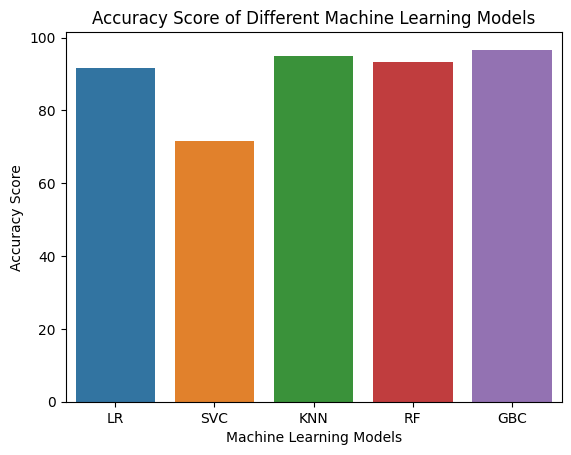

In [178]:
sns.barplot(x='ML_Models', y='ACCURACY_SCORE', data=final_data)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Machine Learning Models')
plt.show()

**Conclusions**

- Logistic Regression (LR) achieved an accuracy score of approximately 91.67%. It demonstrates a reasonable performance in predicting graduate admissions.

- Support Vector Classifier (SVC) achieved an accuracy score of around 71.67%. While the accuracy is lower compared to other models, it may still have utility in certain scenarios.

- K-Nearest Neighbors (KNN) performed impressively with an accuracy score of 95.00%, indicating its capability in distinguishing between likely and unlikely admissions.

- Random Forest (RF) achieved an accuracy score of approximately 95.83%. This ensemble model shows strong predictive power and robustness.

- Gradient Boosting Classifier (GBC) outperformed other models with an accuracy score of about 96.67%. It demonstrates the highest accuracy, suggesting its effectiveness in graduate admission prediction.